![A soccer pitch for an international match.](soccer-pitch.jpg)

## 🧠 Project Motivation

As someone deeply interested in soccer analytics, I've spent years watching both men's and women's international matches. One pattern that caught my attention is that **women’s matches often seem to have more goals scored than men’s**.

Rather than relying on intuition alone, I decided to explore this observation through a structured statistical analysis. The goal is to determine whether this perceived difference in goal scoring is **statistically significant**.

---

## 🎯 Scope of Analysis

To ensure consistency and relevance, I’ve limited the dataset to:

- **Official FIFA World Cup matches only** (excluding qualifiers)
- **Matches played on or after January 1, 2002**

This helps control for changes in tournament structure, competitive intensity, and playing style over time.

---

## 📁 Datasets

I scraped historical match results from a reliable online source and created two datasets:

- `women_results.csv` — All official women’s international matches
- `men_results.csv` — All official men’s international matches

Each dataset includes match dates, teams, and goals scored.

---

## ❓ Research Question

> Are more goals scored in women's international soccer matches than men's?

---

## 🧪 Hypothesis Test

To answer this question, I conducted a **one-tailed hypothesis test** at a **10% significance level (α = 0.10)**.

- **Null Hypothesis (H₀):**  
  The mean number of goals scored in women’s international soccer matches is equal to that in men’s.

- **Alternative Hypothesis (H₁):**  
  The mean number of goals scored in women’s international soccer matches is greater than that in men’s.

---

## 🔜 Next Steps

- Filter both datasets to include only FIFA World Cup matches since 2002
- Calculate total goals per match
- Check assumptions (normality, equal variance)
- Run appropriate statistical test (e.g., Welch’s t-test)
- Visualize and interpret results

to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [81]:
# Start your code here!
import pandas as pd
import pingouin as pg
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import ttest_ind
from scipy.stats import shapiro

In [82]:
women_df = pd.read_csv('women_results.csv')
man_df = pd.read_csv('men_results.csv')
print(women_df.head())
print('\n',man_df.head())

   Unnamed: 0        date home_team  ... home_score  away_score        tournament
0           0  1969-11-01     Italy  ...          1           0              Euro
1           1  1969-11-01   Denmark  ...          4           3              Euro
2           2  1969-11-02   England  ...          2           0              Euro
3           3  1969-11-02     Italy  ...          3           1              Euro
4           4  1975-08-25  Thailand  ...          3           2  AFC Championship

[5 rows x 7 columns]

    Unnamed: 0        date home_team  ... home_score  away_score  tournament
0           0  1872-11-30  Scotland  ...          0           0    Friendly
1           1  1873-03-08   England  ...          4           2    Friendly
2           2  1874-03-07  Scotland  ...          2           1    Friendly
3           3  1875-03-06   England  ...          2           2    Friendly
4           4  1876-03-04  Scotland  ...          3           0    Friendly

[5 rows x 7 columns]


In [83]:
women_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4884 non-null   int64 
 1   date        4884 non-null   object
 2   home_team   4884 non-null   object
 3   away_team   4884 non-null   object
 4   home_score  4884 non-null   int64 
 5   away_score  4884 non-null   int64 
 6   tournament  4884 non-null   object
dtypes: int64(3), object(4)
memory usage: 267.2+ KB


In [84]:
# conver date columns from object dtype to datetime dtype
women_df['date'] = pd.to_datetime(women_df['date'])
man_df['date']   = pd.to_datetime(man_df['date'])

In [85]:
W_fifa_world_cup_2002_df = women_df.query("tournament == 'FIFA World Cup' and date > '2002-01-01'")
m_fifa_world_cup_2002_df = man_df.query("tournament == 'FIFA World Cup' and date > '2002-01-01'")

In [86]:
# sample size in both df( to check does it suttisfied the min condition on sample size > 30)
print(W_fifa_world_cup_2002_df['tournament'].value_counts())
print('\n',m_fifa_world_cup_2002_df['tournament'].value_counts())
W_fifa_world_cup_2002_df['total_score'] = W_fifa_world_cup_2002_df['home_score'] + W_fifa_world_cup_2002_df['away_score']
m_fifa_world_cup_2002_df['total_score'] = m_fifa_world_cup_2002_df['home_score'] + m_fifa_world_cup_2002_df['away_score']

FIFA World Cup    200
Name: tournament, dtype: int64

 FIFA World Cup    384
Name: tournament, dtype: int64


## Different Normality check to find its normaly distribute

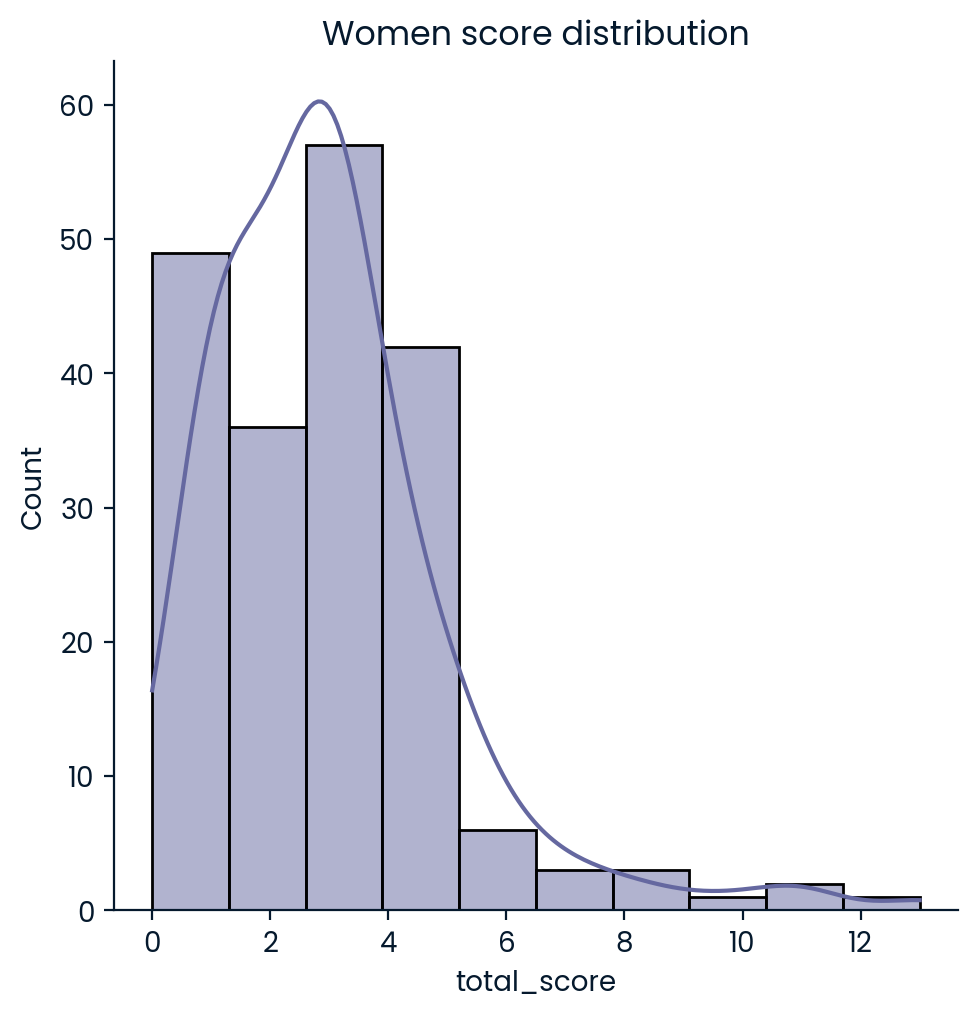

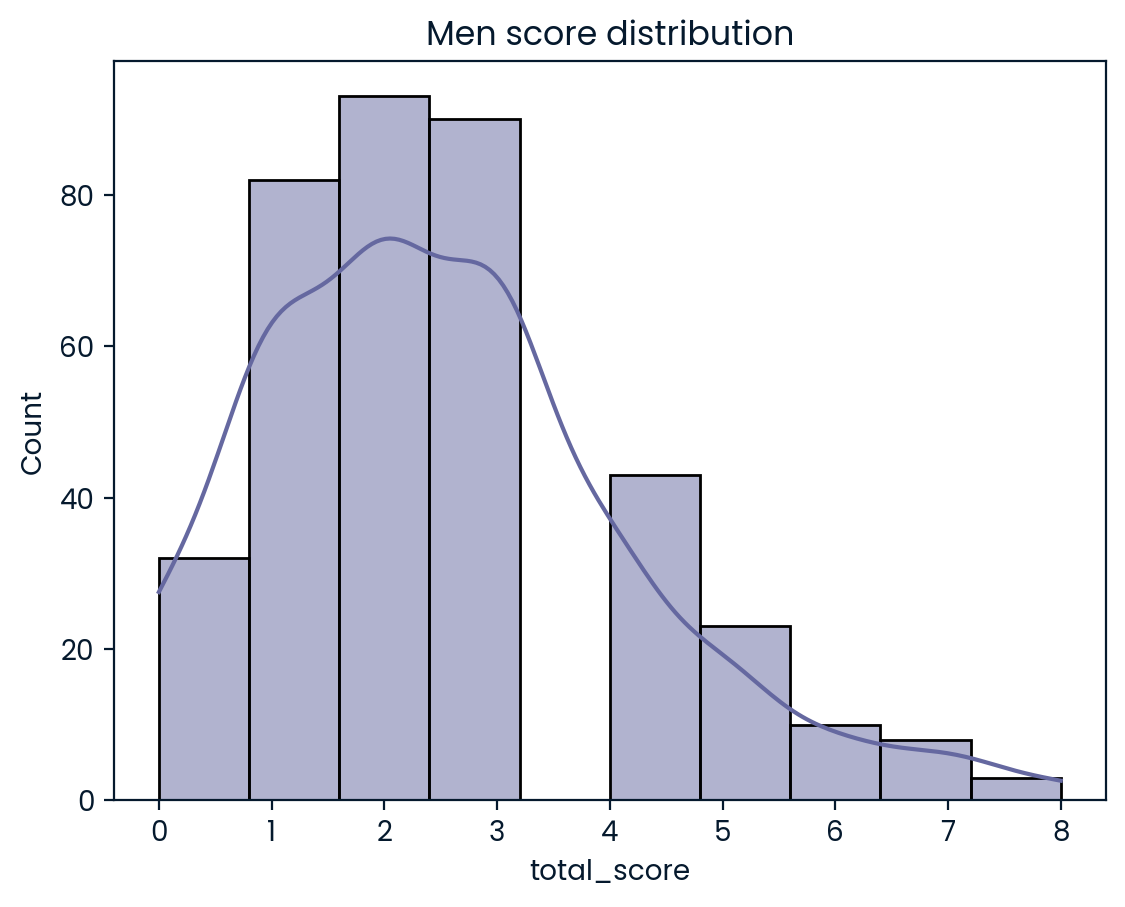

In [87]:
# Histogram 
# Women score distribution
sns.displot(W_fifa_world_cup_2002_df['total_score'], kde=True , bins = 10)
plt.title('Women score distribution')
plt.show()

# Men score distribution
sns.histplot(m_fifa_world_cup_2002_df['total_score'], kde=True , bins = 10)
plt.title('Men score distribution')
plt.show()

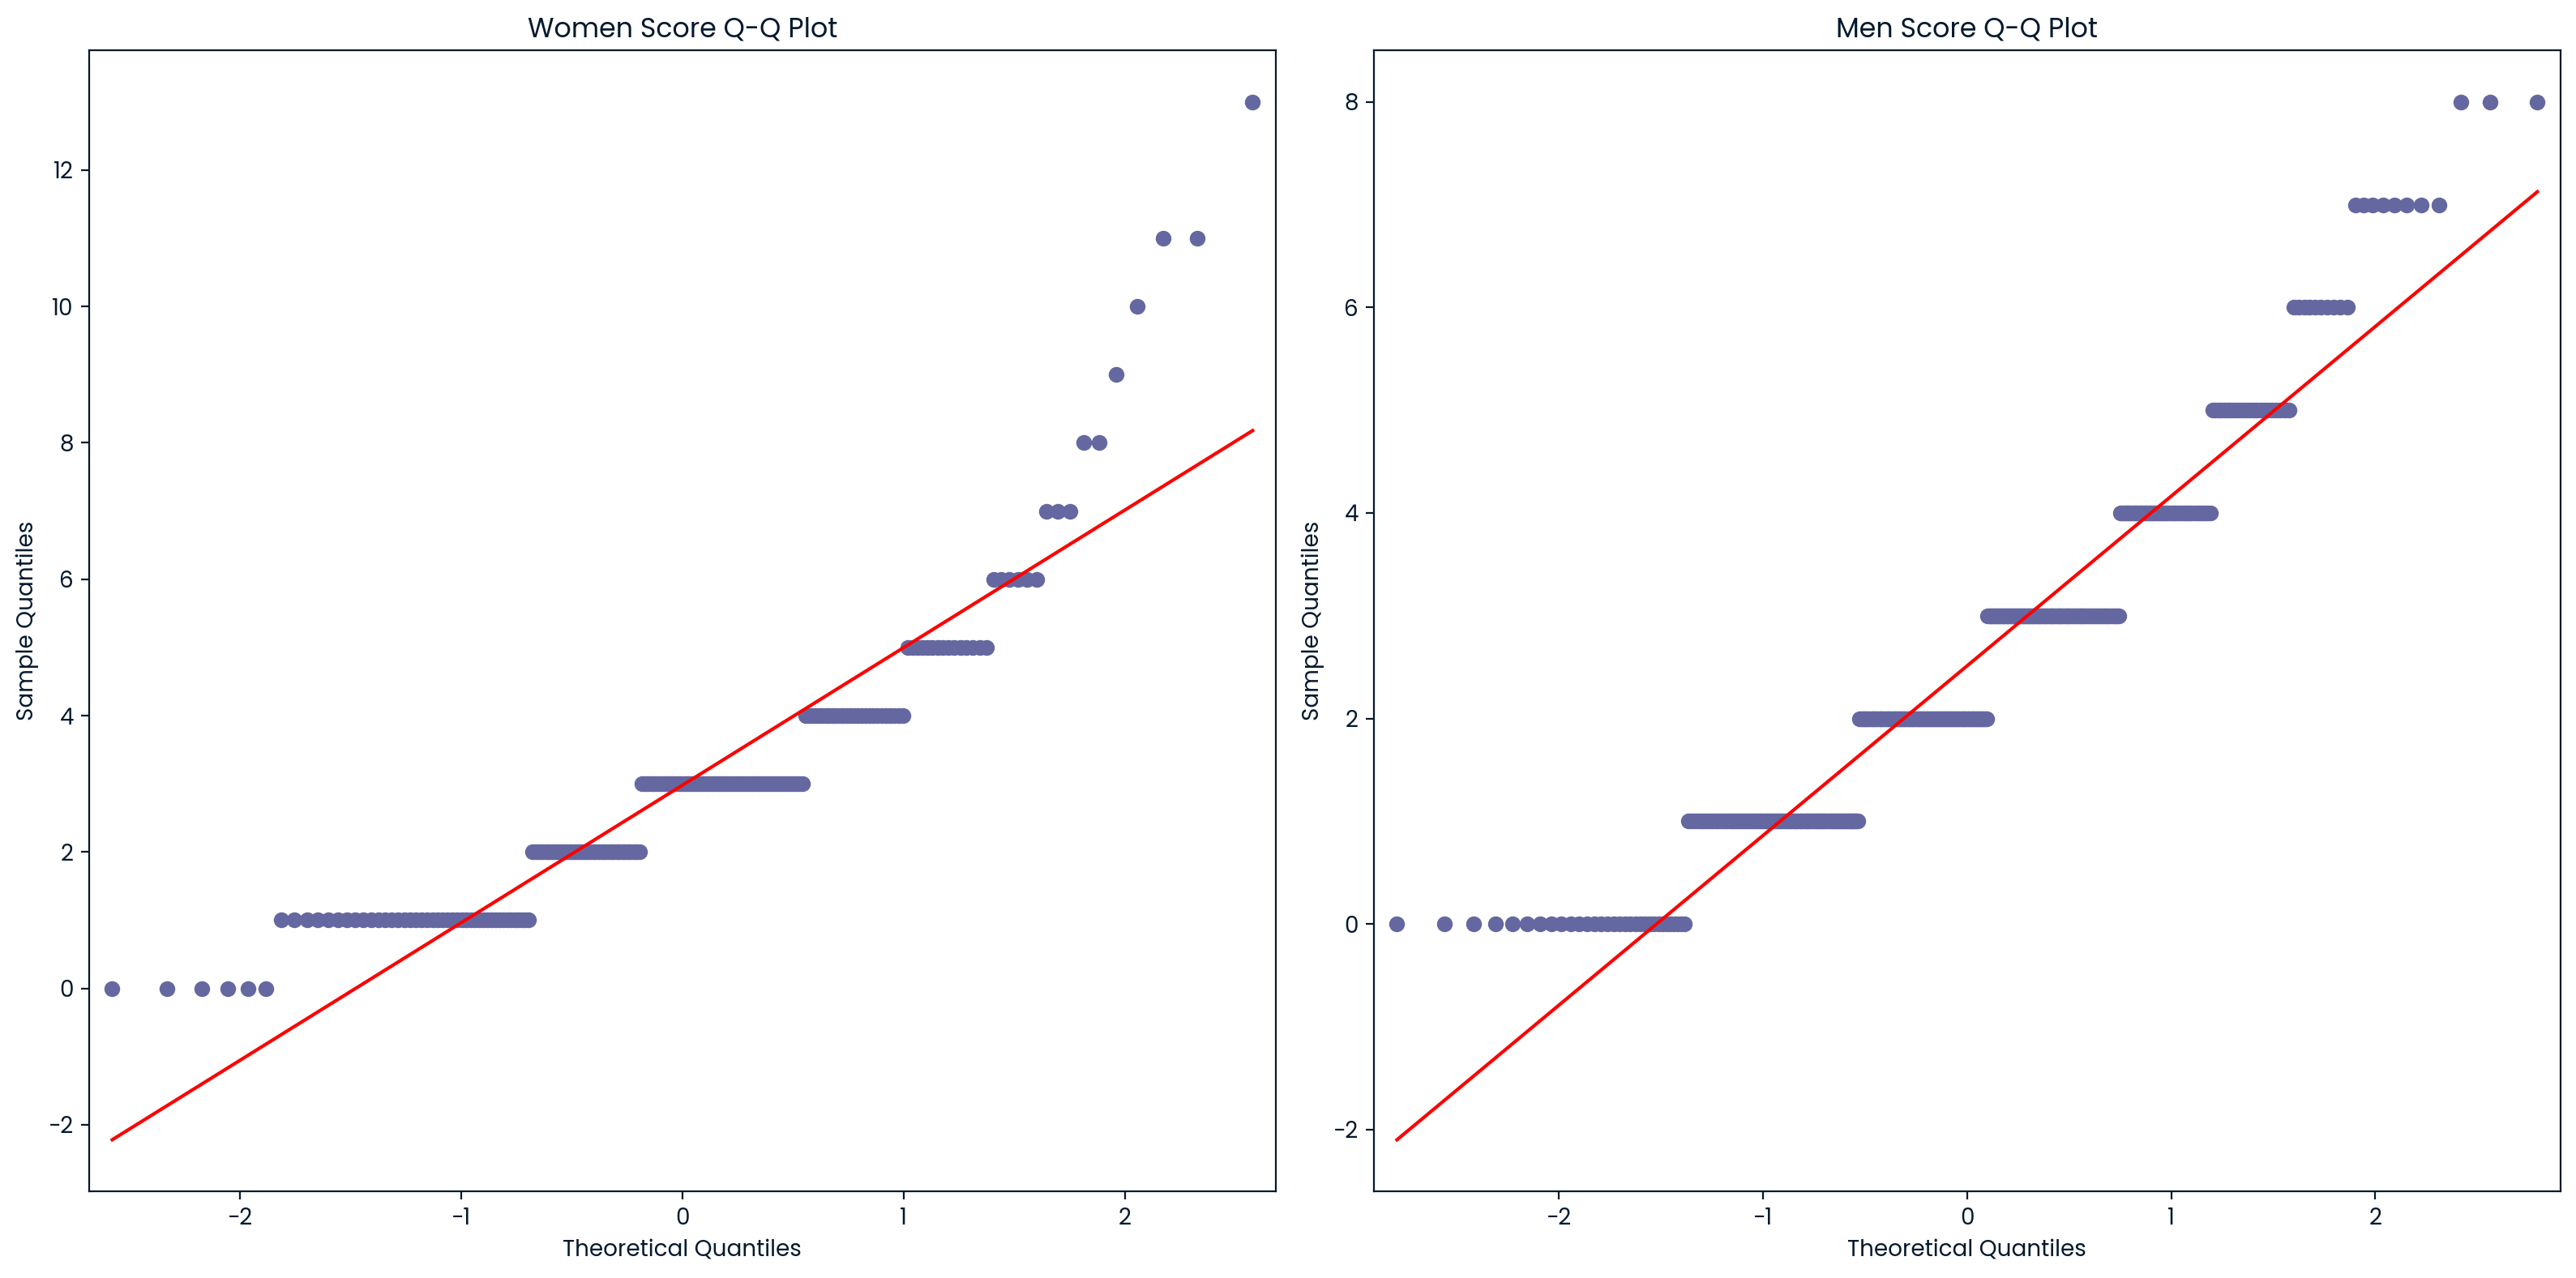

In [88]:
#   QQ plot for normality check

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Women score Q-Q plot
sm.qqplot(W_fifa_world_cup_2002_df['total_score'], line='s', ax=axes[0], fmt='b')
axes[0].set_title("Women Score Q-Q Plot")

# Men score Q-Q plot
sm.qqplot(m_fifa_world_cup_2002_df['total_score'], line='s', ax=axes[1], fmt='g')
axes[1].set_title("Men Score Q-Q Plot")

plt.tight_layout()
plt.show()



In [89]:
# Statistical test to check the normality 
#1. shapiro-wilk test
shapiro_result_women = shapiro(W_fifa_world_cup_2002_df['total_score'].values)
shapiro_result_man = shapiro(m_fifa_world_cup_2002_df['total_score'].values)
print('woman shapiro resulr: ', shapiro_result_women)
print('man shapiro resulr: ', shapiro_result_man)

woman shapiro resulr:  ShapiroResult(statistic=0.8491013050079346, pvalue=3.8905201759850683e-13)
man shapiro resulr:  ShapiroResult(statistic=0.9266489744186401, pvalue=8.894154401688226e-13)


Since both datasets have a sample size greater than the minimum threshold (n > 30), the Central Limit Theorem suggests that the sampling distribution of the mean can be approximated as normal, even though the data itself does not follow a normal distribution. Therefore, given the sufficiently large sample sizes, it is reasonable to proceed with parametric tests.

In [91]:
print('man avg score :'+str(m_fifa_world_cup_2002_df['total_score'].mean()))
print('women avg score :'+str(W_fifa_world_cup_2002_df['total_score'].mean()))

man avg score :2.5130208333333335
women avg score :2.98


The average scores for `men (2.51)` are lower than those for `women (2.98)`. But is this difference statistically significant? We aim to answer this question with a `statistical test`.

null and alternative hypotheses:

- H0: µ(Avg_score_man) - µ(Avg_score_women) = 0
- H1: µ(Avg_score_women) - µ(Avg_score_man) > 0
- significance level, alpha, to 0.15.

In [92]:
# ttest_indep (parametirc test)
ttest_ind(W_fifa_world_cup_2002_df["total_score"].values , m_fifa_world_cup_2002_df["total_score"].values , alternative = 'greater' )

Ttest_indResult(statistic=2.9956678151313443, pvalue=0.0014274905852169545)

- Non Parametric test for two independent used  Wilcoxon-Mann-Whitney test b/c its not following the normal distribution 

In [93]:
pg.mwu(W_fifa_world_cup_2002_df["total_score"].values , m_fifa_world_cup_2002_df["total_score"].values , alternative = 'greater')

,U-val,alternative,p-val,RBC,CLES
MWU,43273.0,greater,0.005107,-0.126901,0.563451


In [99]:
# Example p-values
p_val_ttest = 0.0014
p_val_mwu = 0.0051
alpha = 0.10  # significance level at 10%

# T-test result
if p_val_ttest < alpha:
    ttest_result = "reject"
    conclusion_ttest = (
        f"As the p-value ({p_val_ttest}) is below the significance level of {alpha}, "
        "we can reject the null hypothesis supporting the alternative."
    )
else:
    ttest_result = "fail to reject"
    conclusion_ttest = (
        f"As the p-value ({p_val_ttest}) is above the significance level of {alpha}, "
        "we fail to reject the null hypothesis."
    )

# Mann-Whitney U test result
if p_val_mwu < alpha:
    mwu_result = "reject"
    conclusion_mwu = (
        f"Applying Mann-Whitney U test, since the p-value ({p_val_mwu}) is below the significance level of {alpha}, "
        "we can reject the null hypothesis supporting the alternative."
    )
else:
    mwu_result = "fail to reject"
    conclusion_mwu = (
        f"Applying Mann-Whitney U test, since the p-value ({p_val_mwu}) is above the significance level of {alpha}, "
        "we fail to reject the null hypothesis."
    )

print(conclusion_ttest)
print(conclusion_mwu)

As the p-value (0.0014) is below the significance level of 0.1, we can reject the null hypothesis supporting the alternative.
Applying Mann-Whitney U test, since the p-value (0.0051) is below the significance level of 0.1, we can reject the null hypothesis supporting the alternative.
